In [55]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Import iris dataset

In [56]:
iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=[['sepal length', 'sepal width', 'petal length', 'petal width']])
df

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# SCALING THE DATA

In [57]:
scaler = StandardScaler()
df[['sepal length', 'sepal width', 'petal length', 'petal width']] = scaler.fit_transform(df[['sepal length', 'sepal width', 'petal length', 'petal width']])
df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


,sepal length,sepal width,petal length,petal width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


# VIsualisation des cluster à partir le regroupement du dataset

In [58]:
df['target']=pd.Series(iris.target)
species=[]
for i in range(len(df)):
  if df.iloc[i]['target'] == 0:
   species.append('setora')
  elif df.iloc[i]['target'] == 1:
    species.append('versicolor')
  elif df.iloc[i]['target'] == 2:
    species.append('virginica')
df['Species'] = species

Text(0, 0.5, 'sepal length')

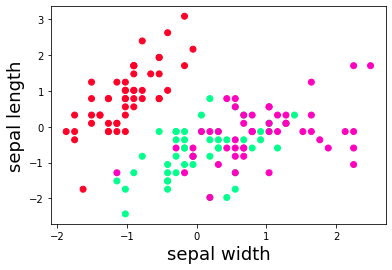

In [59]:
plt.scatter(x=df['sepal length'],y = df['sepal width'], c = iris.target, cmap='gist_rainbow')
plt.xlabel('sepal width', fontsize=18)
plt.ylabel('sepal length', fontsize=18)

# Résultat en utilisant KMeans avec k=3

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


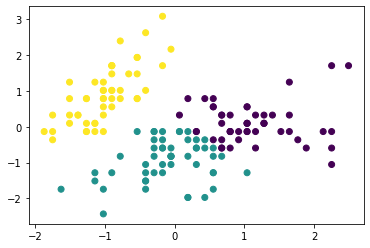

In [60]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['sepal length','sepal width']])
df['kmeans_3'] = kmeans.labels_
df
plt.scatter(x=df['sepal length'],y = df['sepal width'], c = df['kmeans_3'])
plt.show()